<a href="https://cognitiveclass.ai"><img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width = 400> </a>

<h1 align=center><font size = 5>Peer Review Final Assignment</font></h1>

## Introduction


In this lab, you will build an image classifier using the VGG16 pre-trained model, and you will evaluate it and compare its performance to the model we built in the last module using the ResNet50 pre-trained model. Good luck!

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>    

1. <a href="#item41">Download Data 
2. <a href="#item42">Part 1</a>
3. <a href="#item43">Part 2</a>  
4. <a href="#item44">Part 3</a>  

</font>
    
</div>

<a id="item41"></a>

## Download Data

Use the <code>wget</code> command to download the data for this assignment from here: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

Use the following cells to download the data.

In [1]:
pip install wget

Note: you may need to restart the kernel to use updated packages.


In [2]:
import wget

In [3]:
# !wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

/bin/bash: wget: command not found


In [8]:
# !unzip -q  concrete_data_week4.zip

In [10]:
from os import listdir
from os.path import isfile, join

In [11]:
#listdir()
directory="concrete_data_week4"
valid_dir = "concrete_data_week4/valid"
test_dir = "concrete_data_week4/test"
train_dir = "concrete_data_week4/train"

negative = "negative"
positive = "positive"

valid_positive_dir = "concrete_data_week4/valid/positive"
test_positive_dir = "concrete_data_week4/test/positive"
train_positive_dir = "concrete_data_week4/train/positive"

valid_negative_dir = "concrete_data_week4/valid/negative"
test_negative_dir = "concrete_data_week4/test/negative"
train_negative_dir = "concrete_data_week4/train/negative"


listdir(valid_dir)

['positive', '.DS_Store', 'negative']

After you unzip the data, you fill find the data has already been divided into a train, validation, and test sets.

<a id="item42"></a>

## Part 1

In this part, you will design a classifier using the VGG16 pre-trained model. Just like the ResNet50 model, you can import the model <code>VGG16</code> from <code>keras.applications</code>.

You will essentially build your classifier as follows:
1. Import libraries, modules, and packages you will need. Make sure to import the *preprocess_input* function from <code>keras.applications.vgg16</code>.
2. Use a batch size of 100 images for both training and validation.
3. Construct an ImageDataGenerator for the training set and another one for the validation set. VGG16 was originally trained on 224 × 224 images, so make sure to address that when defining the ImageDataGenerator instances.
4. Create a sequential model using Keras. Add VGG16 model to it and dense layer.
5. Compile the mode using the adam optimizer and the categorical_crossentropy loss function.
6. Fit the model on the augmented data using the ImageDataGenerators.

Use the following cells to create your classifier.

In [12]:
from PIL import Image
from matplotlib.pyplot import imshow
import pandas
import matplotlib.pylab as plt
import os
import glob

In [13]:
def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + data_sample[1])

In [14]:
negative_file_path=os.path.join(train_dir,negative)
negative_file_path

'concrete_data_week4/train/negative'

In [15]:
 os.listdir(negative_file_path)[0:3]

['14147.jpg', '04354.jpg', '13628.jpg']

In [16]:
[os.path.join(negative_file_path,file) for file in  os.listdir(negative_file_path)][0:3]

['concrete_data_week4/train/negative/14147.jpg',
 'concrete_data_week4/train/negative/04354.jpg',
 'concrete_data_week4/train/negative/13628.jpg']

In [17]:
negative_files=[os.path.join(negative_file_path,file) for file in  os.listdir(negative_file_path) if file.endswith(".jpg")]
negative_files.sort()
negative_files[0:3]

['concrete_data_week4/train/negative/00001.jpg',
 'concrete_data_week4/train/negative/00002.jpg',
 'concrete_data_week4/train/negative/00003.jpg']

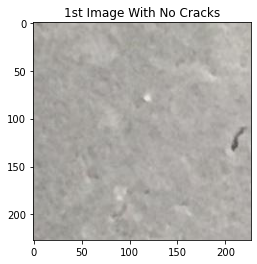

In [18]:
image1 = Image.open(negative_files[0])
plt.imshow(image1)
plt.title("1st Image With No Cracks")
plt.show()

In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Dense

from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import load_model

In [20]:
num_classes = 2

image_resize = 224

batch_size_training = 100
batch_size_validation = 100

In [21]:
data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

In [22]:
train_generator = data_generator.flow_from_directory(
    train_dir,
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical')

Found 30001 images belonging to 2 classes.


In [23]:
valid_generator = data_generator.flow_from_directory(
    valid_dir,
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical')

Found 9501 images belonging to 2 classes.


In [24]:
model = Sequential()

In [25]:
model.add(VGG16(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))

58892288/58889256 [==============================] - 35s 1us/step


In [26]:
model.add(Dense(num_classes, activation='softmax'))

In [27]:
model.layers

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 2)                 1026      
Total params: 14,715,714
Trainable params: 14,715,714
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.layers[0].layers

In [30]:
model.layers[0].trainable = False

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 2)                 1026      
Total params: 14,715,714
Trainable params: 1,026
Non-trainable params: 14,714,688
_________________________________________________________________


In [32]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(valid_generator)
num_epochs = 2

In [34]:
fit_history = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=valid_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/2
301/301 [==============================] - 9745s 32s/step - loss: 0.1452 - accuracy: 0.9423 - val_loss: 0.0329 - val_accuracy: 0.9932
Epoch 2/2
301/301 [==============================] - 8882s 30s/step - loss: 0.0251 - accuracy: 0.9947 - val_loss: 0.0187 - val_accuracy: 0.9952


In [35]:
model.save('classifier_vgg16_model.h5')

<a id="item43"></a>

## Part 2

In this part, you will evaluate your deep learning models on a test data. For this part, you will need to do the following:

1. Load your saved model that was built using the ResNet50 model. 
2. Construct an ImageDataGenerator for the test set. For this ImageDataGenerator instance, you only need to pass the directory of the test images, target size, and the **shuffle** parameter and set it to False.
3. Use the **evaluate_generator** method to evaluate your models on the test data, by passing the above ImageDataGenerator as an argument. You can learn more about **evaluate_generator** [here](https://keras.io/models/sequential/).
4. Print the performance of the classifier using the VGG16 pre-trained model.
5. Print the performance of the classifier using the ResNet pre-trained model.


Use the following cells to evaluate your models.

In [36]:
#model_resnet = Sequential()
model_resnet = load_model('classifier_resnet_model.h5')

In [37]:
model_vgg16 = load_model('classifier_vgg16_model.h5')

In [38]:
test_generator = data_generator.flow_from_directory(
    test_dir,
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    shuffle=False)

Found 500 images belonging to 2 classes.


In [39]:
score_vgg16 = model_vgg16.evaluate_generator(test_generator, verbose=1)

Instructions for updating:
Please use Model.evaluate, which supports generators.
5/5 [==============================] - 88s 18s/step - loss: 0.0156 - accuracy: 0.9960


In [40]:
print("Loss using VGG16: ", score_vgg16[0])
print("Accuracy using VGG16: ", score_vgg16[1])

Loss using VGG16:  0.015561276115477085
Accuracy using VGG16:  0.9959999918937683


In [41]:
score_resnet = model_resnet.evaluate_generator(test_generator, verbose=1)

5/5 [==============================] - 29s 6s/step - loss: 0.0020 - accuracy: 1.0000


In [42]:
print("Loss using ResNet50: ", score_resnet[0])
print("Accuracy using ResNet50: ", score_resnet[1])

Loss using ResNet50:  0.00195990689098835
Accuracy using ResNet50:  1.0


<a id="item44"></a>

## Part 3

In this model, you will predict whether the images in the test data are images of cracked concrete or not. You will do the following:

1. Use the **predict_generator** method to predict the class of the images in the test data, by passing the test data ImageDataGenerator instance defined in the previous part as an argument. You can learn more about the **predict_generator** method [here](https://keras.io/models/sequential/).
2. Report the class predictions of the first five images in the test set. You should print something list this:

<center>
    <ul style="list-style-type:none">
        <li>Positive</li>  
        <li>Negative</li> 
        <li>Positive</li>
        <li>Positive</li>
        <li>Negative</li>
    </ul>
</center>

Use the following cells to make your predictions.

In [43]:
predict_vgg16 = model.predict_generator(test_generator, verbose=1)

Instructions for updating:
Please use Model.predict, which supports generators.
5/5 [==============================] - 88s 18s/step


In [44]:
print("Predictions using VGG16: \n", predict_vgg16[:5])

Predictions using VGG16: 
 [[0.9951574  0.00484256]
 [0.9891088  0.0108912 ]
 [0.96473944 0.03526063]
 [0.99198407 0.00801598]
 [0.98990214 0.01009787]]


In [45]:
predictions = []
for i in range(5):
    item = predict_vgg16[i][1]
    if item > 0.5:
        predictions.append("Negative")
    else:
        predictions.append("Positive")
predictions

['Positive', 'Positive', 'Positive', 'Positive', 'Positive']

In [46]:
predict_resnet = model_resnet.predict(test_generator, verbose=1)

5/5 [==============================] - 28s 6s/step


In [47]:
print("Prediction using ResNet50: \n", predict_resnet[:5])

Prediction using ResNet50: 
 [[9.9961060e-01 3.8942118e-04]
 [9.9809581e-01 1.9041698e-03]
 [9.9591786e-01 4.0822015e-03]
 [9.9592340e-01 4.0765577e-03]
 [9.9905139e-01 9.4860955e-04]]


In [48]:
predictions_resnet = []
for i in range(5):
    item = predict_resnet[i][1]
    if item > 0.5:
        predictions_resnet.append("Negative")
    else:
        predictions_resnet.append("Positive")
predictions_resnet

['Positive', 'Positive', 'Positive', 'Positive', 'Positive']

### Thank you for completing this lab!

This notebook was created by Alex Aklson.

This notebook is part of a course on **Coursera** called *AI Capstone Project with Deep Learning*. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0321EN_Coursera_Week4_LAB1).

<hr>

Copyright &copy; 2020 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).